# Stock market analysis (2020) tesla vs volkswagen

we start by importing the libraries we will use for our analysis.
    - pandas for data manipulation
    - numpy for working with arrays
    - matplotlib and seaborn for graphical representation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Now we load our Tesla, Volkswagen and Ford 2020 stocks data into variables namely tesla_data, volks_data and ford_data

In [45]:
tesla_data = pd.read_csv(r"C:\Users\Asus\Downloads\TSLA.csv", index_col='Date', parse_dates=True)
volks_data = pd.read_csv(r"C:\Users\Asus\Downloads\VWAGY.csv", index_col='Date', parse_dates=True)
ford_data = pd.read_csv(r"C:\Users\Asus\Downloads\F.csv", index_col='Date', parse_dates=True)

In [8]:
tesla_data.head(n=3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000


In [10]:
volks_data.head(n=3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,19.667999,19.896999,19.639999,19.889999,19.255404,71000
2020-01-03,19.430000,19.540001,19.378000,19.410000,18.790718,35500
2020-01-06,19.360001,19.650000,19.330000,19.620001,18.994019,115300


In [47]:
ford_data.head(n=3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,9.29,9.42,9.19,9.42,9.262475,43425700
2020-01-03,9.31,9.37,9.15,9.21,9.055987,45040800
2020-01-06,9.10,9.17,9.06,9.16,9.006823,43372300


Lets quickly check if all our datasets have been stored as pandas dataframe.

In [46]:
type(tesla_data), type(volks_data), type(ford_data)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

we start by looking at summary statistics for all the 3 datasets we have.
here we can look at the mean , standard-deviation, min-value, max-value and interquartile values for the specific dataset

In [15]:
tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02
mean,269.416259,277.230867,261.376617,269.976783,269.976783,6.384281e+07
std,148.441646,152.291120,144.242465,149.155458,149.155458,4.469842e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,7.255600e+06
25%,146.088501,153.256500,141.213497,149.087006,149.087006,2.930625e+07
50%,199.883003,202.885002,197.259003,200.267998,200.267998,5.876525e+07
75%,411.722504,422.917511,405.339996,412.315010,412.315010,8.707665e+07
max,653.690002,654.320007,618.500000,649.880005,649.880005,3.046940e+08


In [16]:
volks_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,16.855452,17.012301,16.677699,16.848946,16.431004,164843.096234
std,2.009813,1.950785,2.057410,2.011862,2.028882,115935.641849
min,11.120000,11.320000,10.600000,10.680000,10.339252,35500.000000
25%,15.890000,16.070000,15.725000,15.845000,15.445951,85250.000000
50%,17.150000,17.280001,16.959999,17.139999,16.780001,134200.000000
75%,18.310001,18.452500,18.225001,18.374001,17.814395,198950.000000
max,20.270000,20.350000,20.180000,20.240000,19.910999,907700.000000


In [48]:
ford_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02
mean,6.963500,7.076250,6.830542,6.945125,6.933613,7.799888e+07
std,1.394252,1.377434,1.424228,1.404636,1.386710,3.003533e+07
min,4.270000,4.420000,3.960000,4.010000,4.010000,2.785390e+07
25%,5.987500,6.097500,5.820000,5.940000,5.940000,5.688458e+07
50%,6.905000,7.000000,6.805000,6.910000,6.910000,7.177960e+07
75%,8.025000,8.092500,7.910000,8.007500,8.007500,9.383295e+07
max,9.310000,9.500000,9.290000,9.450000,9.450000,2.318008e+08


In [11]:
tesla_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Now lets check the indexes of all the dataframes to confirm our date values in index have dtype of datetime64 

In [53]:
tesla_data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11'],
              dtype='datetime64[ns]', name='Date', length=240, freq=None)

In [54]:
volks_data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10'],
              dtype='datetime64[ns]', name='Date', length=239, freq=None)

## Time series 

A time series is a sequence of numerical data points taken at successively equal spaced points in time.
In investing, Time-series tracks the movement of stock price over a specific period of time.

In [57]:
import matplotlib.dates as mdates  # --> this module helps us render dates according to our convinience

#### Monthly plot

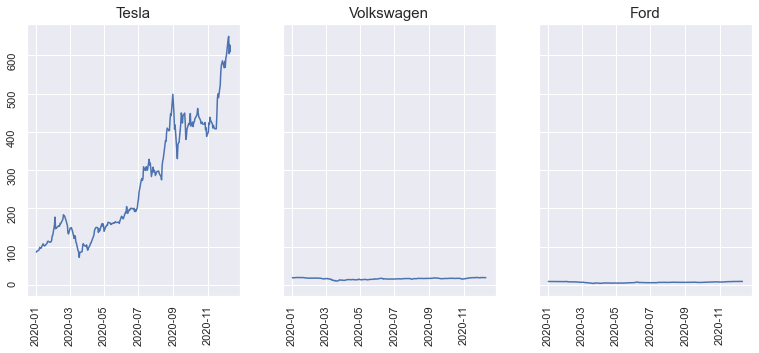

In [56]:
f, (ax1,ax2, ax3) = plt.subplots(1,3, sharey=True, sharex=True, figsize=(13,5))
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
f.gca().xaxis.set_major_locator(mdates.MonthLocator())

ax1.plot(tesla_data.index, tesla_data['Adj Close'])
ax1.set_title("Tesla", fontsize=15)
ax1.tick_params(labelrotation=90)

ax2.plot(volks_data.index, volks_data['Adj Close'])
ax2.set_title("Volkswagen", fontsize=15)
ax2.tick_params(labelrotation=90)

ax3.plot(ford_data.index, ford_data['Adj Close'])
ax3.set_title("Ford", fontsize=15)
ax3.tick_params(labelrotation=90)

plt.show()

It can clearly be seen how tesla's stocks have been rising dominantly and volkswagen's and ford's stocks have been consitent . There was a negligible downfall in volkswagens stocks in end days of march but it didnt affect the consistency of companies stocks. thus, there was no net profit or loss for the investors in case of volkswagen and ford in year 2020 where as investers of tesla are enjoying the tremendous rise in value for companies stocks.

#### Resampling ( Quarterly )

since stocks of volkswagen and ford have neither grown or fallen, lets analyse tesla's stocks which have been rising rapidly

lets look into quarter wise performance of tesla.
For that we will first get mean of tesla's stocks broken down into 4 quarters.

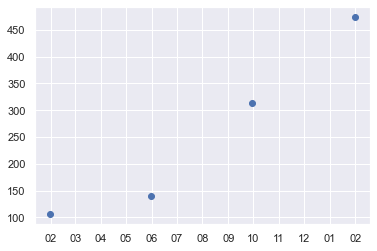

In [18]:
tesla_quarter_data = tesla_data.resample('4M').mean()
plt.scatter(tesla_quarter_data.index, tesla_quarter_data['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.show()

#### Resampling ( Weekly )

lets now see how tesla's stocks grew weekly. 'o' symbols in chart represent weeks in the following graph and the line will represent overall growth or downfall over months.

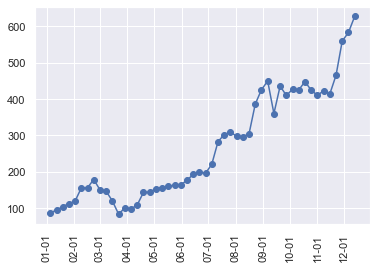

In [23]:
weekly_tesla_data = tesla_data.resample('w').mean()
plt.plot(weekly_tesla_data.index, weekly_tesla_data['Adj Close'], '-o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

we can see that although tesla has performed better than other companies , we can see stocks went down from 'march' till starting of 'april'. It can be an impact of sudden coronavirus pandemic outbreak . but overall stocks have been rising maybe due to popularity or less competition or maybe a new product or model was launched .
Thus we can conclude that investing in all the three companies will not cause you a loss but long term investement in tesla will surely be benificial.
also, volkswagen and ford can increase their stocks by launching a new product such as electric cars such as tesla or more commercially viable product or more public attention can be drawn through offering sale over the products and advertising

### Thankyu!!